In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm

In [14]:
T = 501
true_ctr = 0.5
a, b = 1, 1 # beta priors
plot_indices = (10,20, 30, 50, 100, 200, 500) # when to plot
data = np.empty(T) # tracking

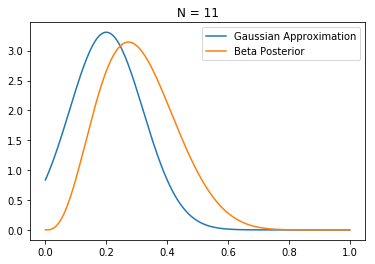

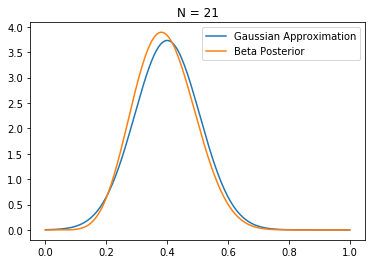

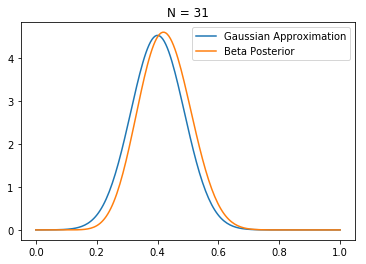

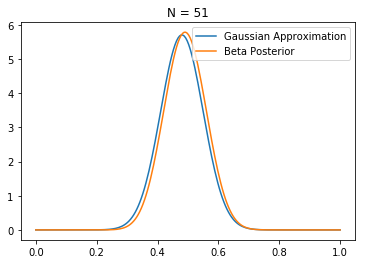

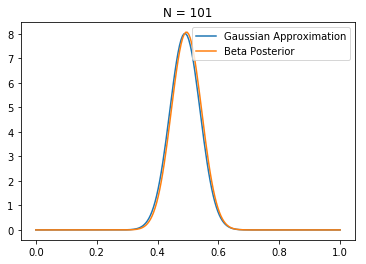

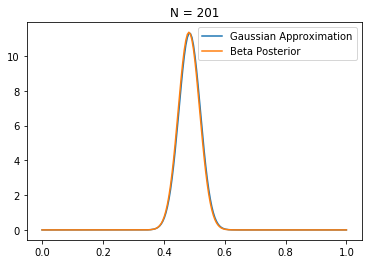

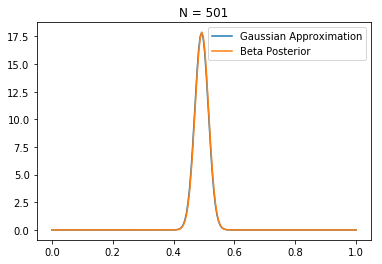

In [15]:
for i in range(T):
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x
    
    # update a and b
    a += x
    b += 1 - x
    
    if i in plot_indices: # plot 
        p = data[:i].mean() # maximum likelihood estimate of ctr
        n = i + 1 # number of samples collected
        std = np.sqrt(p*(1-p)/n) # calculate std
        
        x = np.linspace(0, 1, 200)
        g = norm.pdf(x, loc = p, scale = std) # Gaussian distribution
        plt.plot(x, g, label='Gaussian Approximation')
        
        posterior = beta.pdf(x, a=a, b=b)
        plt.plot(x, posterior, label="Beta Posterior")
        plt.legend()
        plt.title(f"N = {n}")
        plt.show()

This is also a demonstration that the central limit theorem is true.

When N is large enough, two distributions are extremely similar.